In [1]:
from corpus import Corpus
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
corpus = Corpus.from_file('data/train.json')

In [3]:
corpus.build_vectors()
corpus.build_np_vecs()

In [4]:
np.random.seed(78)
limit = 6000
category_docs = [[] for _ in range(4)]
for i, doc in enumerate(corpus.docs[:limit]):
    category_docs[doc.int_category].append(i)
chosen_ones = []
real_labels = []
for i in range(4):
    chosen_ones.append(np.random.choice(category_docs[i], 100, replace=False))
chosen_ones = np.array(chosen_ones, dtype=np.int)
all_chosen_ones = chosen_ones.reshape((-1))
print(all_chosen_ones)
real_labels = np.array([doc.int_category for doc in corpus.docs[:limit]], dtype=np.int)
print(real_labels)

[3621 5976 5933 5591 2921  382 1081 4879 5999  875 3287 2388 2452 4030
 2548 4374 4301 5852 2694 4078 3468 4449 4982 1472 5027 4753 1664 4519
 4021 5130  386 4531 3000 5847 1336 5680 1542 1399 2212 4746  579   92
  645 3098 1307 4097 1379 1437 3400 3013 1497  988 4475 4706 2406 1324
  828 5416 4996  649 5640 3547 4127 1289 5323  433 3557 4058 5634 3242
 3259 2033  661  573 2094 5375 1703  731 5697 1621 5932  236 5082 2326
  813 3290 3891 3600  230  835  267 1449 5866 4387 2532 4343 2732 2979
 1479 3055 4539 3602 5089 4752  509 3650 1492 5280 2268 4990 4268 4026
 4548 3536 3344 2940 3329 1858 1491 1421 1996 4245 4971 5953  796 2074
 1070 1992 3322 3363 5602 5645 2340 3898  674 1495  390 1229  491 2218
 4504   50 4284 3437 3737 4797 1631 3880 4286 1117 1278 5743  205 5828
 1693 2564 4038 4709 5460 5165 4204  735 5513 5135 4839 5452 3849  600
  952 4914 1121 4561 1410 5232 2606 3668  841  277  327 1543 1685 3381
 4719 4052 3755 4261   34 5202 4987 2788 4307 5181 1524 4165 2350   17
 4220 

In [5]:
from kmeans import Kmeans, Shower

In [6]:
def evaluate_vectors(vecs, limit, verbose=True):
    kmeans = Kmeans()
    kmeans.set_vectors(vecs[:limit])
    kmeans.set_random_centers(seed=90)

    shower = Shower()
    shower.set_vectors(vecs)
    shower.set_indexes(all_chosen_ones)
    t0 = time()
    shower.fit()
    t1 = time()
    print("fitting time: ", t1 - t0)
    for i in range(100):
        t0 = time()
        if verbose and i % 10 == 0:
            shower.set_labels(kmeans.labels)
            shower.plot()
            plt.show()
            shower.set_labels(real_labels)
            shower.plot()
            plt.show()

        old_cost = kmeans.cost_function
        kmeans.one_iter()
        diff = kmeans.cost_function - old_cost
        t1 = time()

        print("itreation ", i, "diff = ", diff, "time = ", t1 - t0)
        if abs(diff) < 0.001:
            break
    print("final result: ")
    shower.set_labels(kmeans.labels)
    shower.plot()
    plt.show()
    shower.set_labels(real_labels)
    shower.plot()
    plt.show()

In [6]:
evaluate_vectors(corpus.np_vecs, limit=limit)

NameError: name 'evaluate_vectors' is not defined

# Word2vec

In [7]:
from corpus import Corpus
import numpy as np
import matplotlib.pyplot as plt
from time import time
import gensim.models

In [8]:
corpus = Corpus.from_file('data/train.json')

In [9]:
def one_doc_to_vec(doc, model):
    return np.array(list(map(lambda i: model.wv[corpus.num_to_word[i]], doc.word_iterator))).mean(axis=0)

100 5
+++++++++++++++++++++++++
fitting time:  2.5280869007110596
itreation  0 diff =  -118.04973 time =  0.007370948791503906
itreation  1 diff =  -19.320015 time =  0.004787921905517578
itreation  2 diff =  -7.675354 time =  0.004622697830200195
itreation  3 diff =  -3.6996384 time =  0.00457000732421875
itreation  4 diff =  -1.5214157 time =  0.005050182342529297
itreation  5 diff =  -0.5345688 time =  0.005179166793823242
itreation  6 diff =  -0.19776154 time =  0.0051419734954833984
itreation  7 diff =  -0.06285858 time =  0.005166769027709961
itreation  8 diff =  -0.022598267 time =  0.0049550533294677734
itreation  9 diff =  -0.006942749 time =  0.004794120788574219
itreation  10 diff =  -0.004348755 time =  0.0053119659423828125
itreation  11 diff =  -0.002456665 time =  0.00484466552734375
itreation  12 diff =  -0.00020599365 time =  0.004714012145996094
final result: 


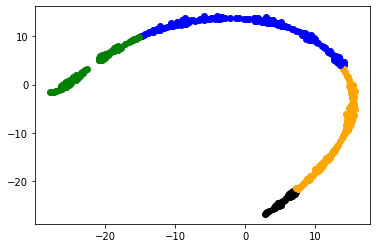

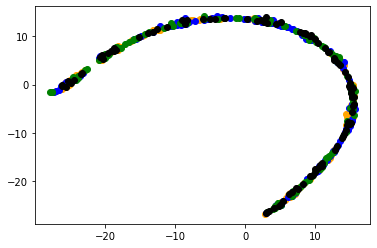

-------------------------



In [12]:
sentences = corpus
window_sizes = [3, 5, 7]
dims = [50, 100, 300]
window_sizes = [5]
dims = [100]
for dim in dims:
    for window in window_sizes:
        print(dim, window)
        print('+++++++++++++++++++++++++')
#         model = gensim.models.Word2Vec(sentences=sentences, min_count=1, window=window, size=dim)
        model = gensim.models.Word2Vec(min_count=1, window=window, size=dim)
        model.build_vocab(sentences)
        model.train(sentences, total_examples=1, epochs=20)
        new_vecs = np.array(list(map(lambda x: one_doc_to_vec(x, model), corpus.docs)))
        evaluate_vectors(new_vecs, limit=6000, verbose=False)
        print('-------------------------\n')